In [ ]:
#(0, 0, 'CIFTI_STRUCTURE_CORTEX_LEFT')
#(1, 29696, 'CIFTI_STRUCTURE_CORTEX_RIGHT')
#(2, 59412, 'CIFTI_STRUCTURE_ACCUMBENS_LEFT')
#(3, 59547, 'CIFTI_STRUCTURE_ACCUMBENS_RIGHT')
#(4, 59687, 'CIFTI_STRUCTURE_AMYGDALA_LEFT')
#(5, 60002, 'CIFTI_STRUCTURE_AMYGDALA_RIGHT')
#(6, 60334, 'CIFTI_STRUCTURE_BRAIN_STEM')
#(7, 63806, 'CIFTI_STRUCTURE_CAUDATE_LEFT')
#(8, 64534, 'CIFTI_STRUCTURE_CAUDATE_RIGHT')
#(9, 65289, 'CIFTI_STRUCTURE_CEREBELLUM_LEFT')
#(10, 73998, 'CIFTI_STRUCTURE_CEREBELLUM_RIGHT')
#(11, 83142, 'CIFTI_STRUCTURE_DIENCEPHALON_VENTRAL_LEFT')
#(12, 83848, 'CIFTI_STRUCTURE_DIENCEPHALON_VENTRAL_RIGHT')
#(13, 84560, 'CIFTI_STRUCTURE_HIPPOCAMPUS_LEFT')
#(14, 85324, 'CIFTI_STRUCTURE_HIPPOCAMPUS_RIGHT')
#(15, 86119, 'CIFTI_STRUCTURE_PALLIDUM_LEFT')
#(16, 86416, 'CIFTI_STRUCTURE_PALLIDUM_RIGHT')
#(17, 86676, 'CIFTI_STRUCTURE_PUTAMEN_LEFT')
#(18, 87736, 'CIFTI_STRUCTURE_PUTAMEN_RIGHT')
#(19, 88746, 'CIFTI_STRUCTURE_THALAMUS_LEFT')
#(20, 90034, 'CIFTI_STRUCTURE_THALAMUS_RIGHT')

In [1]:
import os, glob, nibabel as nib, subprocess, numpy as np, matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, nilearn
import matplotlib.cm as cm, seaborn as sns, matplotlib
from nilearn import plotting
import subprocess, numpy as np, nibabel as nib
from sklearn.metrics import pairwise_distances
import sys
from PIL import Image
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
cd /mnt/c/Users/xavie/Dropbox\ \(MIT\)/MIT/_ACTIVE_PROJECTS/homotopy/laterality_index

/mnt/c/Users/xavie/Dropbox (MIT)/MIT/_ACTIVE_PROJECTS/homotopy/laterality_index


In [3]:
dcon = nib.load('/mnt/c/Users/xavie/Desktop/HCP_S1200_1003_rfMRI_MSMAll_groupPCA_d4500ROW_zcorr.dconn.nii').get_data()
caudategradients = nib.load('result_caudatebilateral.dscalar.nii').get_data()
cerebellumgradients = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
lenticulargradients = nib.load('result_pallidumandputamen.dscalar.nii').get_data()
thalamusgradients = nib.load('result_thalamus_bilateral.dscalar.nii').get_data()
cerebralcortexgradients = nib.load('result_fromcortextocortex_gradients_moregradients.dscalar.nii').get_data()

/usr/local/lib/python3.5/dist-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/home/xavierguell/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)


In [45]:
thalamusgradients.shape

(1, 1, 1, 1, 14, 2536)

In [46]:
thalamus_grad1 = thalamusgradients[0,0,0,0,0,:].copy()
thalamus_grad2 = thalamusgradients[0,0,0,0,1,:].copy()

In [47]:
# THALAMUS
#(19, 88746, 'CIFTI_STRUCTURE_THALAMUS_LEFT')
#(20, 90034, 'CIFTI_STRUCTURE_THALAMUS_RIGHT')

dcon_thalamus = dcon[88746:, 88746:].copy()
thalamus_grad1 = thalamusgradients[0,0,0,0,0,:].copy()
thalamus_grad2 = thalamusgradients[0,0,0,0,1,:].copy()
# left thalamus is the first 1288 of these 2536
dcon_thalamus.shape

(2536, 2536)

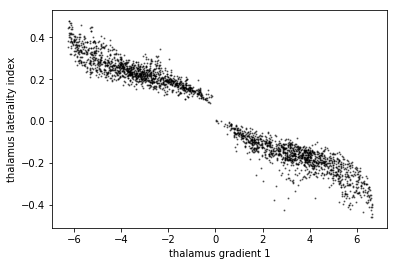

In [11]:
left_value_each_voxel_thalamus = {}
i=0
for row in dcon_thalamus[:1288]:
    left_value_each_voxel_thalamus[i] = row
    i=i+1
    
left_value_each_voxel_thalamus_df = pd.DataFrame.from_dict(left_value_each_voxel_thalamus)
# transform to absolute values
left_value_each_voxel_thalamus_df_abs = left_value_each_voxel_thalamus_df
# add all values in a new column
left_value_each_voxel_thalamus_df_abs['left_added'] = left_value_each_voxel_thalamus_df_abs.sum(axis=1)

right_value_each_voxel_thalamus = {}
i=0
for row in dcon_thalamus[1288:]:
    right_value_each_voxel_thalamus[i] = row
    i=i+1
    
right_value_each_voxel_thalamus_df = pd.DataFrame.from_dict(right_value_each_voxel_thalamus)
# add all values in a new column
# keep only highest value and put that number in a new column in the dataframe:
right_value_each_voxel_thalamus_df['right_added'] = right_value_each_voxel_thalamus_df.sum(axis=1)

thalamus_rightscores = np.array(right_value_each_voxel_thalamus_df_abs['right_added'])
thalamus_leftscores = np.array(left_value_each_voxel_thalamus_df_abs['left_added'])

thalamus_scores = (thalamus_leftscores - thalamus_rightscores) / ((thalamus_leftscores + thalamus_rightscores))

plt.scatter(thalamus_grad1, thalamus_scores, alpha=0.5, s=1, c='k')
plt.xlabel('thalamus gradient 1')
plt.ylabel('thalamus laterality index')
#plt.savefig('thalamus_laterality_vs_grad1_PosNegNotAbs', dpi=600)

In [81]:
# LENTICULAR
#(15, 86119, 'CIFTI_STRUCTURE_PALLIDUM_LEFT')
#(16, 86416, 'CIFTI_STRUCTURE_PALLIDUM_RIGHT')
#(17, 86676, 'CIFTI_STRUCTURE_PUTAMEN_LEFT')
#(18, 87736, 'CIFTI_STRUCTURE_PUTAMEN_RIGHT')

dcon_lenticular = dcon[86119:88746, 86119:88746].copy()
lenticular_grad1 = lenticulargradients[0,0,0,0,0,:].copy()
lenticular_grad2 = lenticulargradients[0,0,0,0,1,:].copy()

# left pallidum is the first 297
# right pallidum is from 297 to 557
# left putamen is from 557 to 1617
# right putamen is from 1617 to the rest
dcon_lenticular.shape

(2627, 2627)

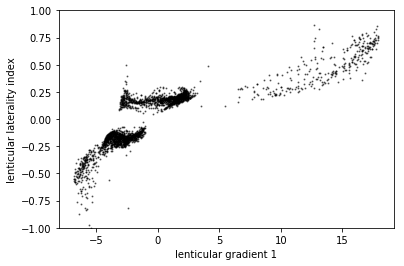

In [17]:
left_value_each_voxel_lenticular = {}
i=0
#take left pallidum
for row in dcon_lenticular[:297]:
    left_value_each_voxel_lenticular[i] = row
    i=i+1

#take left putamen, keeping the previous i value so that items continue being added to the same dictionary   
for row in dcon_lenticular[557:1617]:
    left_value_each_voxel_lenticular[i] = row
    i=i+1
    
left_value_each_voxel_lenticular_df = pd.DataFrame.from_dict(left_value_each_voxel_lenticular)
# transform to absolute values
left_value_each_voxel_lenticular_df_abs = left_value_each_voxel_lenticular_df
# add all values in a new column
left_value_each_voxel_lenticular_df_abs['left_added'] = left_value_each_voxel_lenticular_df_abs.sum(axis=1)

#take right pallidum
right_value_each_voxel_lenticular = {}
i=0
for row in dcon_lenticular[297:557]:
    right_value_each_voxel_lenticular[i] = row
    i=i+1

#take right putamen, keeping the previous i value so that items continue being added to the same dictionary   
for row in dcon_lenticular[1617:]:
    right_value_each_voxel_lenticular[i] = row
    i=i+1
    
right_value_each_voxel_lenticular_df = pd.DataFrame.from_dict(right_value_each_voxel_lenticular)
# transform to absolute values
right_value_each_voxel_lenticular_df_abs = right_value_each_voxel_lenticular_df
# add all values in a new column
right_value_each_voxel_lenticular_df_abs['right_added'] = right_value_each_voxel_lenticular_df_abs.sum(axis=1)

lenticular_rightscores = np.array(right_value_each_voxel_lenticular_df_abs['right_added'])
lenticular_leftscores = np.array(left_value_each_voxel_lenticular_df_abs['left_added'])

lenticular_scores = (lenticular_leftscores - lenticular_rightscores) / ((lenticular_leftscores + lenticular_rightscores))

plt.scatter(lenticular_grad1, lenticular_scores, alpha=0.5, s=1, c='k')
plt.xlabel('lenticular gradient 1')
plt.ylabel('lenticular laterality index')
plt.ylim((-1, 1))
plt.savefig('lenticular_laterality_vs_grad1_PosNegNotAbs', dpi=600)

In [83]:
# CEREBELLUM, WITH GRADIENT 3
#(9, 65289, 'CIFTI_STRUCTURE_CEREBELLUM_LEFT')
#(10, 73998, 'CIFTI_STRUCTURE_CEREBELLUM_RIGHT')
#(11, 83142, 'CIFTI_STRUCTURE_DIENCEPHALON_VENTRAL_LEFT')

dcon_cerebellum = dcon[65289:83142, 65289:83142].copy()
cerebellum_grad1 = cerebellumgradients[0,0,0,0,0,:].copy()
cerebellum_grad2 = cerebellumgradients[0,0,0,0,1,:].copy()
cerebellum_grad3 = cerebellumgradients[0,0,0,0,2,:].copy()
# left cerebellum is the first 8709
dcon_cerebellum.shape

(17853, 17853)

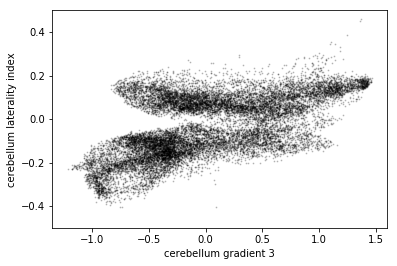

In [20]:
left_value_each_voxel_cerebellum = {}
i=0
for row in dcon_cerebellum[:8709]:
    left_value_each_voxel_cerebellum[i] = row
    i=i+1
    
left_value_each_voxel_cerebellum_df = pd.DataFrame.from_dict(left_value_each_voxel_cerebellum)
# transform to absolute values
left_value_each_voxel_cerebellum_df_abs = left_value_each_voxel_cerebellum_df
# add all values in a new column
left_value_each_voxel_cerebellum_df_abs['left_added'] = left_value_each_voxel_cerebellum_df_abs.sum(axis=1)

right_value_each_voxel_cerebellum = {}
i=0
for row in dcon_cerebellum[8709:]:
    right_value_each_voxel_cerebellum[i] = row
    i=i+1
    
right_value_each_voxel_cerebellum_df = pd.DataFrame.from_dict(right_value_each_voxel_cerebellum)
# transform to absolute values
right_value_each_voxel_cerebellum_df_abs = right_value_each_voxel_cerebellum_df
# add all values in a new column
right_value_each_voxel_cerebellum_df_abs['right_added'] = right_value_each_voxel_cerebellum_df_abs.sum(axis=1)

cerebellum_rightscores = np.array(right_value_each_voxel_cerebellum_df_abs['right_added'])
cerebellum_leftscores = np.array(left_value_each_voxel_cerebellum_df_abs['left_added'])

cerebellum_scores = (cerebellum_leftscores - cerebellum_rightscores) / ((cerebellum_leftscores + cerebellum_rightscores))

plt.scatter(cerebellum_grad3, cerebellum_scores, alpha=0.2, s=0.8, c='k')
plt.xlabel('cerebellum gradient 3')
plt.ylabel('cerebellum laterality index')
plt.ylim((-0.5, 0.5))
plt.savefig('cerebellum_laterality_vs_grad3_PosNegNotAbs', dpi=600)

In [88]:
# CAUDATE, WITH GRADIENT 2
#(7, 63806, 'CIFTI_STRUCTURE_CAUDATE_LEFT')
#(8, 64534, 'CIFTI_STRUCTURE_CAUDATE_RIGHT')
#(9, 65289, 'CIFTI_STRUCTURE_caudate_LEFT')

dcon_caudate = dcon[63806:65289, 63806:65289].copy()
caudate_grad1 = caudategradients[0,0,0,0,0,:].copy()
caudate_grad2 = caudategradients[0,0,0,0,1,:].copy()
# left caudate is the first 728
dcon_caudate.shape

(1483, 1483)

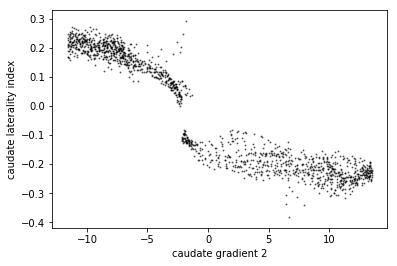

In [89]:
left_value_each_voxel_caudate = {}
i=0
for row in dcon_caudate[:728]:
    left_value_each_voxel_caudate[i] = row
    i=i+1
    
left_value_each_voxel_caudate_df = pd.DataFrame.from_dict(left_value_each_voxel_caudate)
# transform to absolute values
left_value_each_voxel_caudate_df_abs = left_value_each_voxel_caudate_df
# add all values in a new column
left_value_each_voxel_caudate_df_abs['left_added'] = left_value_each_voxel_caudate_df_abs.sum(axis=1)

right_value_each_voxel_caudate = {}
i=0
for row in dcon_caudate[728:]:
    right_value_each_voxel_caudate[i] = row
    i=i+1
    
right_value_each_voxel_caudate_df = pd.DataFrame.from_dict(right_value_each_voxel_caudate)
# transform to absolute values
right_value_each_voxel_caudate_df_abs = right_value_each_voxel_caudate_df
# add all values in a new column
right_value_each_voxel_caudate_df_abs['right_added'] = right_value_each_voxel_caudate_df_abs.sum(axis=1)

caudate_rightscores = np.array(right_value_each_voxel_caudate_df_abs['right_added'])
caudate_leftscores = np.array(left_value_each_voxel_caudate_df_abs['left_added'])

caudate_scores = (caudate_leftscores - caudate_rightscores) / ((caudate_leftscores + caudate_rightscores))

plt.scatter(caudate_grad2, caudate_scores, alpha=0.5, s=1, c='k')
plt.xlabel('caudate gradient 2')
plt.ylabel('caudate laterality index')
plt.savefig('caudate_laterality_vs_grad2_PosNegNotAbs', dpi=600)